# Predicting Hotel Bookings Cancelations using Support Vector Machine Classification

Support-vector machines (SVMs) are supervised learning models used for classification and regression, known for its kernel trick to handle nonlinear input spaces. This template builds, trains, and tunes an SVM for a **classification** problem.

The dataset consists of hotel booking data with details, such as length of stay. Each row represents a booking and whether the booking was canceled (the target variable). You can find more information on this dataset's source and dictionary [here](https://app.datacamp.com/workspace/datasets/dataset-python-hotel-booking-demand).

**Disclaimer**: originally project part of the Data Camp's Data Scientist Track, but extended by adding the sections on feature selection, feature engineering, GridSearchCV, Decision boundaries

### 1. Loading packages and data

In [74]:
# Load packages
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler

# Load the data and replace with your CSV file path
df = pd.read_csv("data/hotel_bookings_clean.csv")
print(df.shape)
df.head(100)

(1500, 16)


,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,total_of_special_requests,avg_daily_rate,booked_by_company,booked_by_agent,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,68,14,2,3,2,0,0,1,130.90,0,1,0,0,0,1
1,0,152,14,1,4,1,0,0,0,42.00,1,0,0,0,0,1
2,0,11,49,0,3,1,0,0,0,36.00,1,0,0,0,0,1
3,1,6,27,0,1,2,0,0,0,139.00,0,1,0,0,1,0
4,1,335,38,0,1,2,0,1,0,85.00,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,46,11,0,1,1,0,0,0,25.00,0,1,0,0,0,1
96,0,100,40,0,4,2,0,0,1,140.00,0,1,0,0,0,1
97,0,39,50,2,8,3,0,0,2,130.90,0,1,0,0,1,0
98,0,243,39,2,2,1,0,0,0,80.70,0,1,0,0,0,1


In [2]:
# Check if there are any null values
df.isnull().sum()

is_canceled                      0
lead_time                        0
arrival_date_week_number         0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
is_repeated_guest                0
previous_cancellations           0
total_of_special_requests        0
avg_daily_rate                   0
booked_by_company                0
booked_by_agent                  0
customer_type_Contract           0
customer_type_Group              0
customer_type_Transient          0
customer_type_Transient-Party    0
dtype: int64

In [3]:
# Check columns to make sure you have feature(s) and a target variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   is_canceled                    1500 non-null   int64  
 1   lead_time                      1500 non-null   int64  
 2   arrival_date_week_number       1500 non-null   int64  
 3   stays_in_weekend_nights        1500 non-null   int64  
 4   stays_in_week_nights           1500 non-null   int64  
 5   adults                         1500 non-null   int64  
 6   is_repeated_guest              1500 non-null   int64  
 7   previous_cancellations         1500 non-null   int64  
 8   total_of_special_requests      1500 non-null   int64  
 9   avg_daily_rate                 1500 non-null   float64
 10  booked_by_company              1500 non-null   int64  
 11  booked_by_agent                1500 non-null   int64  
 12  customer_type_Contract         1500 non-null   i

In [34]:
# Checking the distribution of features
df.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,total_of_special_requests,avg_daily_rate,booked_by_company,booked_by_agent,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,1500.00000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.36600,107.55400,27.175333,0.916000,2.474000,1.871333,0.023333,0.107333,0.556667,103.315633,0.051333,0.870000,0.036000,0.002667,0.736000,0.225333
std,0.48187,107.28495,13.539380,0.933912,1.701937,0.476371,0.151010,1.097550,0.767147,46.719077,0.220750,0.336416,0.186352,0.051588,0.440946,0.417941
min,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,22.00000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,71.382500,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,73.00000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,94.945000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.00000,166.00000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,1.000000,126.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.00000,608.00000,53.000000,8.000000,21.000000,3.000000,1.000000,26.000000,4.000000,345.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2. Splitting the data
To split the data, we'll use the [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. 

In [59]:
# Split the data into two DataFrames: X (features) and y (target variable)
X = df.iloc[:, 1:]  # Specify at least one column as feature(s)
y = df["is_canceled"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1050, 15), (450, 15), (1050,), (450,))

### 3. Feature preprocessing
1. Support Vector Machine models are sensitive to the scale of the feature, thus we will apply standardization (z-score normalization)
<br>
<br>
![zscore normalization](img/zscore.jpg)

2. Creating new features based on domain knowledge - features relevant to the hotel booking domain. E.g. creating a binary feature for weekend bookings and extracting the month to account for seasonality

In [60]:
scaler=StandardScaler().set_output(transform="pandas")
X_train_scaled = scaler.fit_transform(X_train[['lead_time', 'avg_daily_rate']])
X_test_scaled = scaler.transform(X_test[['lead_time', 'avg_daily_rate']])
X_train=X_train.drop(['lead_time', 'avg_daily_rate'], axis=1)
X_test=X_test.drop(['lead_time', 'avg_daily_rate'], axis=1)

X_train=X_train.join(X_train_scaled)
X_test=X_test.join(X_test_scaled)

In [62]:
# a binary feature for weekend bookings
X_train["is_weekend_booking"] = (X_train["stays_in_weekend_nights"] > 0).astype(int)
X_test["is_weekend_booking"] = (X_test["stays_in_weekend_nights"] > 0).astype(int)

# extracting the month as a new feature

#X_train["arrival_month"] = pd.DatetimeIndex(pd.to_datetime((X_train['arrival_date_week_number']-1).astype(str) + "6", format="%Y%U%w")).month
#X_test["arrival_month"] =  pd.DatetimeIndex(pd.to_datetime((X_train['arrival_date_week_number']-1).astype(str) + "6", format="%Y%U%w")).month

In [ ]:
# Creating an interactive feature
X_train["lead_timex_rate"] = X_train["lead_time"] * X_train["avg_daily_rate"]
X_test["lead_timex_rate"] = X_test["lead_time"] * X_test["avg_daily_rate"]

### 4. Feature selection
For this, we will use mutual information (MI) which quantifies the statistical dependence between two random variables or how much information one variable provides about another.
MI is non-negative and equal to zero if and only if the two variables are independent.

Mutual Information Calculation:
For two random variables X and Y, the mutual information (I(X; Y)) can be stated formally as:
I(X; Y) = H(X) - H(X | Y)
where H(X) represents the entropy of X (how much information is in X) and H(X | Y) represents the conditional entropy of X given Y (how much information is in X when Y is known).

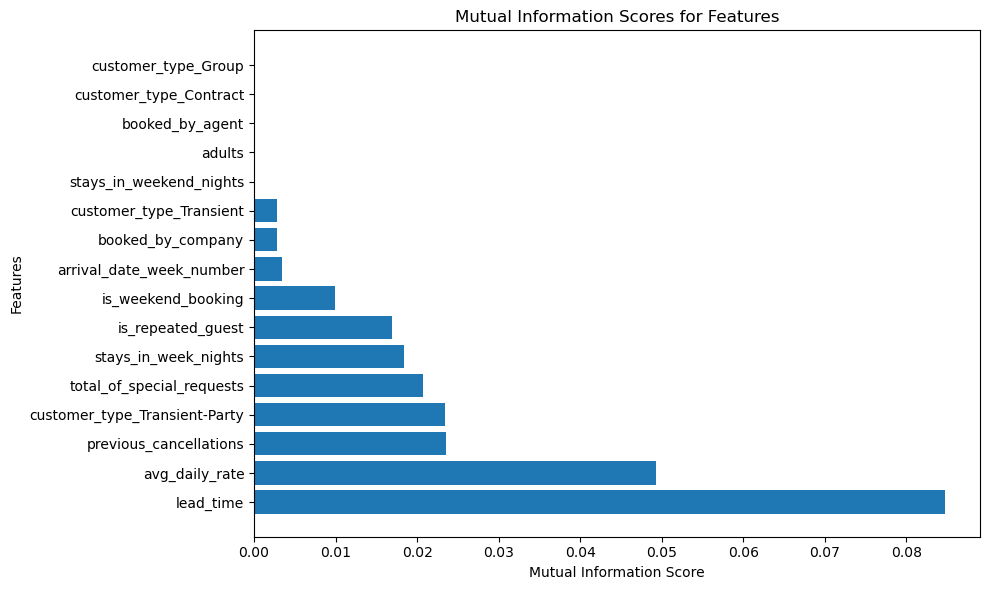

In [63]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Compute mutual information scores for each feature
mi_scores = mutual_info_classif(X_train, y_train)

mi_df = pd.DataFrame({"Feature": X_train.columns, "MI Score": mi_scores})

# Sort features by MI score (descending order)
mi_df.sort_values(by="MI Score", ascending=False, inplace=True)

# Plot the MI scores
plt.figure(figsize=(10, 6))
plt.barh(mi_df["Feature"], mi_df["MI Score"])
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Mutual Information Scores for Features")
plt.tight_layout()
plt.show()

# Select top-k features based on MI scores
#k = 10
#top_k_features = X_train.columns[np.argsort(mi_scores)[-k:]]
#mi_scores

In [22]:
mi_df

,Feature,MI Score
0,lead_time,0.093831
8,avg_daily_rate,0.036974
7,total_of_special_requests,0.035984
6,previous_cancellations,0.034827
13,customer_type_Transient,0.030374
4,adults,0.024597
12,customer_type_Group,0.023785
14,customer_type_Transient-Party,0.015761
3,stays_in_week_nights,0.013869
9,booked_by_company,0.013627


In [64]:
selected_features=mi_df[mi_df['MI Score']>0]['Feature'].to_list() #selecting features over 0.03 MI score

In [20]:
y_train.value_counts()

is_canceled
0    664
1    386
Name: count, dtype: int64

In [70]:
from imblearn.under_sampling import RandomUnderSampler

# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=123)

# Fit and transform the data
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)
params = {
    "kernel": "linear",  # Kernel type: 'linear', 'poly', 'rbf', 'sigmoid', or 'precomputed'
    "C": 1,  # Regularization parameter, squared l2 penalty
    "gamma": 0.01,  # Kernel coefficient (a float, 'scale', or 'auto') for 'rbf', 'poly' and 'sigmoid'
    "degree": 3,  # Degree of ‘poly’ kernel function
    "random_state": 123,
 #   'class_weight': "balanced",
}

clf = svm.SVC(**params)

# Train the SVM classifer on the train set
#clf = clf.fit(X_train[selected_features], y_train)
clf = clf.fit(X_train_undersampled, y_train_undersampled)

# Predict the outcomes on the test set
#y_pred = clf.predict(X_test[selected_features])
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.72


### 5. Building a support vector machine classifier

The following code builds a scikit-learn support vector machine classifier (`svm.SVC`) using the most fundamental parameters.

In [68]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "kernel": "linear",  # Kernel type: 'linear', 'poly', 'rbf', 'sigmoid', or 'precomputed'
    "C": 1,  # Regularization parameter, squared l2 penalty
    "gamma": 0.01,  # Kernel coefficient (a float, 'scale', or 'auto') for 'rbf', 'poly' and 'sigmoid'
    "degree": 3,  # Degree of ‘poly’ kernel function
    "random_state": 123,
 #   'class_weight': "balanced",
}

# Create a svm.SVC with the parameters above
clf = svm.SVC(**params)

# Train the SVM classifer on the train set
clf = clf.fit(X_train[selected_features], y_train)
#clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test[selected_features])
#y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7466666666666667


To evaluate this classifier, we will use accuracy and implement it with sklearn's [metrics.accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function. Note accuracy may not be the best evaluation metric for your problem, especially if your dataset has class imbalance. 

In [6]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7488888888888889


### 6. Hyperparameter tuning with random search

Hyperparameter tuning is considered best practice to improve the efficiency and effectiveness of your machine learning model. In this section, we'll use random search where a fixed number of hyperparameter settings are sampled from specified probability distributions.

Note: SVMs can take noticeably longer to train on larger datasets compared to other models (e.g. base model uses inversion of n×n matrix = O(n3) ). If that's the case, you can adjust the parameter space and reduce the number of folds and candidates in `RandomizedSearchCV()`. Otherwise, you may want to consider another classification model, such as decision trees.

In [78]:
# Define a parameter grid with distributions of possible parameters to use
rs_param_grid = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.1, 1, 10],
    "gamma": [0.00001, 0.0001, 0.001, 0.01, 0.1],
}

# Create a svm.SVC object
clf = svm.SVC(random_state=123)

# Instantiate RandomizedSearchCV() with clf and the parameter grid
clf_rs = GridSearchCV(
    estimator=clf,
 #   param_distributions=rs_param_grid,
    param_grid=rs_param_grid,
    cv=5,  # Number of folds
#    n_iter=5,  # Number of parameter candidate settings to sample
    verbose=2,  # The higher this is, the more messages are outputed
#    random_state=123,
)

# Train the model on the training set
clf_rs.fit(X_train[selected_features], y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", clf_rs.best_params_)
print("Best accuracy found: ", clf_rs.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ..................C=0.1, gamma=1e-05, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=1e-05, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=1e-05, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=1e-05, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=1e-05, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1e-05, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=1e-05, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=1e-05, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=1e-05, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=1e-05, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-0

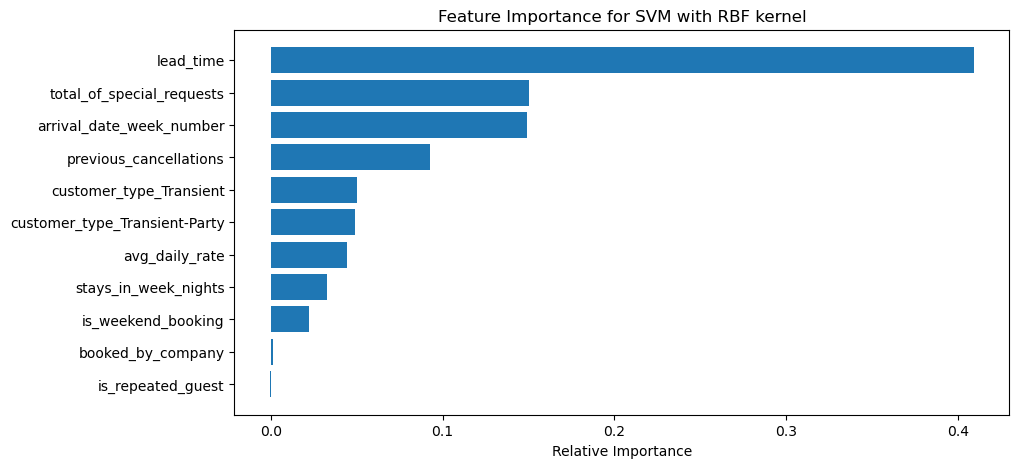

In [81]:
from sklearn.inspection import permutation_importance

svm = svm.SVC(C=10, kernel='rbf', gamma=0.01)
svm.fit(X_train[selected_features], y_train)

# Calculate the permutation importance of each feature
perm_importance = permutation_importance(svm, X_train[selected_features], y_train)

# Normalize the permutation importance scores to sum up to 1
perm_importance_normalized = perm_importance.importances_mean / perm_importance.importances_mean.sum()

# Assume the feature names are stored in a list called feature_names
features = np.array(selected_features)

# Sort the features by their importance scores
sorted_idx = perm_importance_normalized.argsort()

# Plot the feature importance as a horizontal bar chart
plt.figure(figsize=(10, 5))
plt.title('Feature Importance for SVM with RBF kernel')
plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx])
plt.xlabel('Relative Importance')
plt.show()


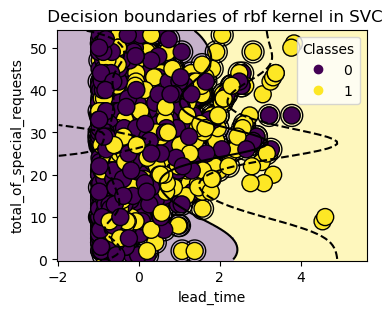

In [98]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm

features_2=['lead_time', 'arrival_date_week_number']
X_filtered=X_train[features_2].values
y_filtered=y_train
def plot_training_data_with_decision_boundary(kernel):
    # Train the SVC
    clf2 = svm.SVC(C=10, kernel=kernel, gamma=0.01)
    clf2.fit(X_filtered, y_filtered)

    # Settings for plotting
    _, ax = plt.subplots(figsize=(4, 3))
 #   x_min, x_max, y_min, y_max = -3, 3, -3, 3
#    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf2, "X": X_filtered, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf2.support_vectors_[:, 0],
        clf2.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    scatter = ax.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered, s=150, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_xlabel('lead_time')
    ax.set_ylabel('total_of_special_requests')
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()


plot_training_data_with_decision_boundary('rbf')

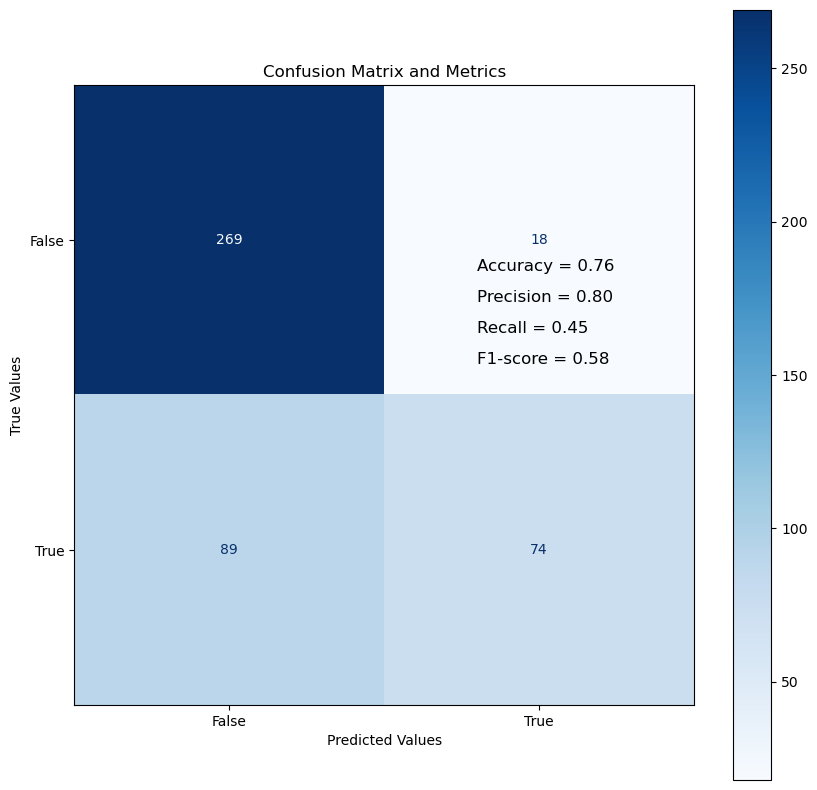

In [103]:
# confusion matrix

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
clf_f = svm.SVC(C=10, kernel='rbf', gamma=0.01)
clf_f.fit(X_train[selected_features], y_train)
preds=clf_f.predict(X_test[selected_features])

cm = confusion_matrix(y_test, preds)
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

cmp = ConfusionMatrixDisplay(cm, display_labels=['False', 'True'])

fig, ax = plt.subplots(figsize=(10, 10))
cmp.plot(ax=ax, cmap='Blues', colorbar=True)

ax.set_title('Confusion Matrix and Metrics')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')

ax.text(0.8, 0.1, f'Accuracy = {acc:.2f}', fontsize=12)
ax.text(0.8, 0.2, f'Precision = {prec:.2f}', fontsize=12)
ax.text(0.8, 0.3, f'Recall = {rec:.2f}', fontsize=12)
ax.text(0.8, 0.4, f'F1-score = {f1:.2f}', fontsize=12)

# Show the plot
plt.show()